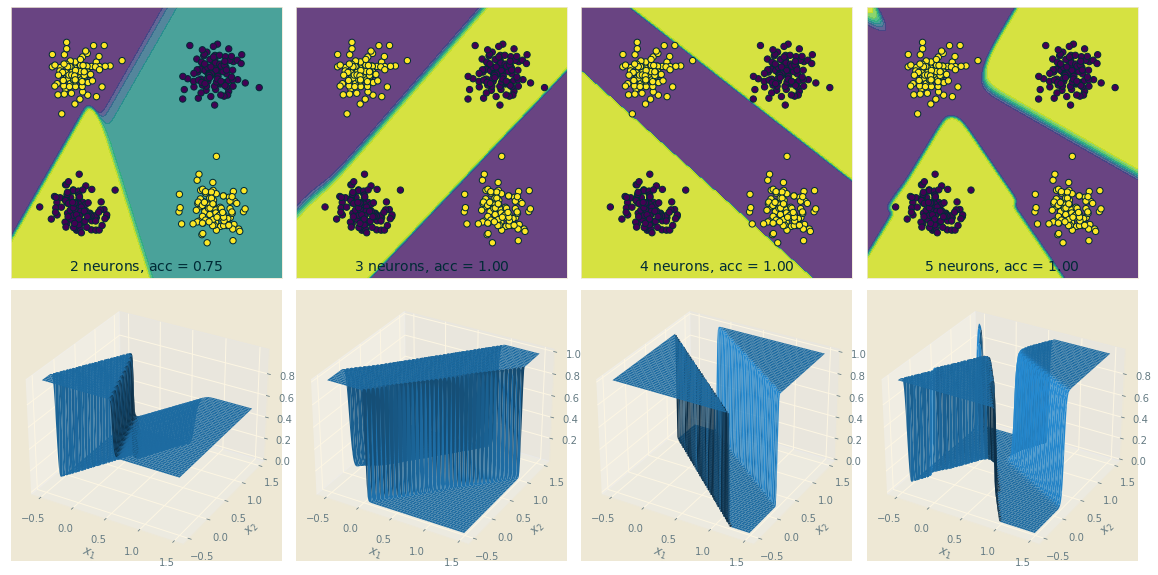

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPClassifier

np.random.seed(12345)

X_xor = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y_xor = np.array([0, 1, 1, 0])
cov = [[0.01, 0], [0, 0.01]]
X, y = X_xor, y_xor
m = 100

for (xx, yy) in zip(X_xor, y_xor):
    x1, x2 = np.random.multivariate_normal(xx, cov, m).T
    X = np.r_[X, np.column_stack((x1, x2))]
    y = np.hstack((y, np.ones(m) * yy))

figure = plt.figure(figsize=(16, 8))

with plt.style.context('Solarize_Light2'):

    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = .01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    i = 0
    col = 4

    for hidden in np.arange(2, 2+col):

        mlp = MLPClassifier(
            hidden_layer_sizes=(hidden,),  # 隐藏层神经元个数
            activation='logistic',         # 激活函数
            max_iter=100,                  # 最大迭代轮数
            solver='lbfgs',                # 求解器
            alpha=0,                       # 正则项系数
            random_state=1,
            verbose=False
        )

        clf = mlp.fit(X, y)
        acc = clf.score(X, y)
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
        Z = Z[:, 0].reshape(xx.shape)

        i += 1
        ax = plt.subplot(2, col, i)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())

        ax.contourf(xx, yy, Z, alpha=.8)
        # contours = ax.contour(xx, yy, Z, np.arange(-0.1, 1.1, 0.1), alpha=.8)
        # ax.clabel(contours)

        ax.scatter(X[:, 0], X[:, 1], s=40, c=y, edgecolors='#002b36')
        ax.text((xx.min()+xx.max())/2, yy.min()+0.05, (r'$%d$ neurons, acc = %.2f' % (hidden, acc)).lstrip('0'), size=14, color='#002b36', horizontalalignment='center')
        # ax.set_title(r"1 hidden layer, $%d$ neurons" % hidden, color='#586e75', size=14)

        ax = plt.subplot(2, col, i+col, projection='3d')

        ax.plot_surface(xx, yy, Z)
        ax.set_xticks(np.arange(x_min, x_max+0.1, 0.5))
        ax.set_yticks(np.arange(y_min, y_max+0.1, 0.5))
        ax.set_xlabel(r'$x_1$')
        ax.set_ylabel(r'$x_2$')

plt.tight_layout()
plt.show()


In [ ]:
clf.predict(X)

In [ ]:
clf.predict_proba(X)

In [ ]:
clf.coefs_

In [ ]:
clf.intercepts_